In [21]:
import tensorflow as tf
import keras as ks
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection

In [22]:
data=pd.read_csv('/content/GOOG.csv').round(2)

In [23]:
puredata=pd.read_csv('/content/GOOG.csv').round(2)

In [24]:
data=data.sample(frac=1).dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Interest,Currency,Inflation,Day,Month
4499,2022-07-06,114.09,116.35,112.25,115.21,115.21,28852000.0,2.90,0.83,8.5,6,7
4361,2021-12-15,144.37,147.52,142.71,147.37,147.37,27280000.0,1.47,0.75,7.0,15,12
2442,2014-05-05,26.17,26.37,25.99,26.32,26.32,20482080.0,2.56,0.59,2.1,5,5
3158,2017-03-08,41.68,41.91,41.59,41.77,41.77,19796000.0,2.48,0.81,2.4,8,3
3902,2020-02-21,75.40,75.61,74.02,74.26,74.26,34634000.0,1.50,0.77,2.3,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2016-08-18,39.00,39.14,38.85,38.88,38.88,14388000.0,1.56,0.76,1.1,18,8
424,2006-04-27,10.53,10.63,10.45,10.46,10.46,334766100.0,4.99,0.57,3.5,27,4
1406,2010-03-23,13.87,13.91,13.50,13.67,13.67,220876809.0,3.73,0.66,2.3,23,3
355,2006-01-18,11.14,11.39,11.04,11.08,11.08,822499417.0,4.42,0.57,4.0,18,1


In [25]:
train=data.iloc[:int(0.8*len(data))]
test=data.iloc[int(0.8*len(data)):]

In [26]:
test.to_csv('testing_dataset.csv')
train.to_csv('training_dataset.csv')

In [27]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Interest,Currency,Inflation,Day,Month
3669,2019-03-20,59.87,61.36,59.81,61.20,61.20,44548000.0,2.57,0.76,1.9,20,3
4463,2022-05-12,111.94,114.86,110.11,113.16,113.16,41464000.0,2.90,0.80,8.6,12,5
3886,2020-01-29,72.94,73.27,72.34,72.93,72.93,21554000.0,1.76,0.76,2.5,29,1
4590,2022-11-11,94.71,97.36,94.16,96.73,96.73,30569100.0,3.89,0.85,7.1,11,11
3127,2017-01-23,40.36,41.04,40.19,40.97,40.97,39272000.0,2.43,0.81,2.5,23,1


In [28]:
X=train.iloc[:,[1,2,3,7,8,9,10,11]]
X.head()

,Open,High,Low,Interest,Currency,Inflation,Day,Month
4499,114.09,116.35,112.25,2.90,0.83,8.5,6,7
4361,144.37,147.52,142.71,1.47,0.75,7.0,15,12
2442,26.17,26.37,25.99,2.56,0.59,2.1,5,5
3158,41.68,41.91,41.59,2.48,0.81,2.4,8,3
3902,75.40,75.61,74.02,1.50,0.77,2.3,21,2


In [29]:
Y=train.iloc[:,[4]]
Y.head()

,Close
4499,115.21
4361,147.37
2442,26.32
3158,41.77
3902,74.26


In [30]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [31]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
def modelbuild():
    model = models.Sequential()
    model.add(ks.layers.Reshape((1,8,),input_shape=(8,)))
    model.add(ks.layers.LSTM(48, return_sequences=True, activation='relu', input_shape=(1,8,)))

    #model.add(ks.layers.Dropout(0.2))
    model.add(ks.layers.LSTM(6,activation='relu'))

    model.add(ks.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=metric)
    return model
model=modelbuild()

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 48)             10944     
                                                                 
 lstm_3 (LSTM)               (None, 6)                 1320      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________


In [33]:
x_train['Currency']=x_train['Currency'].astype(np.float64)
x_train['Interest']=x_train['Interest'].astype(np.float64)
x_train['Inflation']=x_train['Inflation'].astype(np.float64)
x_test['Currency']=x_test['Currency'].astype(np.float64)
x_test['Interest']=x_test['Interest'].astype(np.float64)
x_test['Inflation']=x_test['Inflation'].astype(np.float64)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 3518 to 1139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2998 non-null   float64
 1   High       2998 non-null   float64
 2   Low        2998 non-null   float64
 3   Interest   2998 non-null   float64
 4   Currency   2998 non-null   float64
 5   Inflation  2998 non-null   float64
 6   Day        2998 non-null   int64  
 7   Month      2998 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 210.8 KB


In [34]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[stop])
#training the model

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/100
94/94 [==============================] - 4s 12ms/step - loss: 935.0312 - root_mean_squared_error: 30.5783 - mean_absolute_error: 17.4350 - mean_absolute_percentage_error: 46.1965 - mean_squared_logarithmic_error: 1.3090 - val_loss: 8.6273 - val_root_mean_squared_error: 2.9372 - val_mean_absolute_error: 2.2763 - val_mean_absolute_percentage_error: 9.9815 - val_mean_squared_logarithmic_error: 0.0194
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 3.4497 - root_mean_squared_error: 1.8573 - mean_absolute_error: 1.3875 - mean_absolute_percentage_error: 6.2233 - mean_squared_logarithmic_error: 0.0081 - val_loss: 2.2254 - val_root_mean_squared_error: 1.4918 - val_mean_absolute_error: 1.1093 - val_mean_absolute_percentage_error: 4.7232 - val_mean_squared_logarithmic_error: 0.0049
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 1.6623 - root_mean_squared_error: 1.2893 - mean_absolute_error: 0.9257 - mean_absolute_percentage_error: 3.

In [35]:
X=test.iloc[:,[1,2,3,7,8,9,10,11]]
Y=test.iloc[:,[4]]

In [36]:
X=X.astype(np.float64)
X.tail()

,Open,High,Low,Interest,Currency,Inflation,Day,Month
3020,39.00,39.14,38.85,1.56,0.76,1.1,18.0,8.0
424,10.53,10.63,10.45,4.99,0.57,3.5,27.0,4.0
1406,13.87,13.91,13.50,3.73,0.66,2.3,23.0,3.0
355,11.14,11.39,11.04,4.42,0.57,4.0,18.0,1.0
3649,56.00,56.17,55.26,2.68,0.77,1.5,20.0,2.0


In [37]:
Y.tail()

,Close
3020,38.88
424,10.46
1406,13.67
355,11.08
3649,55.69


In [38]:
test_loss, rmse, mae, mape, msle = model.evaluate(X,Y, verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

30/30 [==============================] - 0s 2ms/step - loss: 0.4168 - root_mean_squared_error: 0.6456 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 1.1518 - mean_squared_logarithmic_error: 2.3939e-04

Mean Squared Error:  0.4168446362018585
Root Mean Squared Error:  0.6456350684165955
Mean Absolute Error:  0.3762073218822479
Mean Absolute Percentage Error:  1.151841402053833
Mean Squared Logarithmic Error:  0.0002393881877651438
Want to save model?
y


In [39]:
PX=puredata.iloc[:,[1,2,3,7,8,9,10,11]].dropna()
PY=puredata.iloc[:,[4]]
predicted_prices=model.predict(PX.astype(np.float64))

147/147 [==============================] - 1s 3ms/step


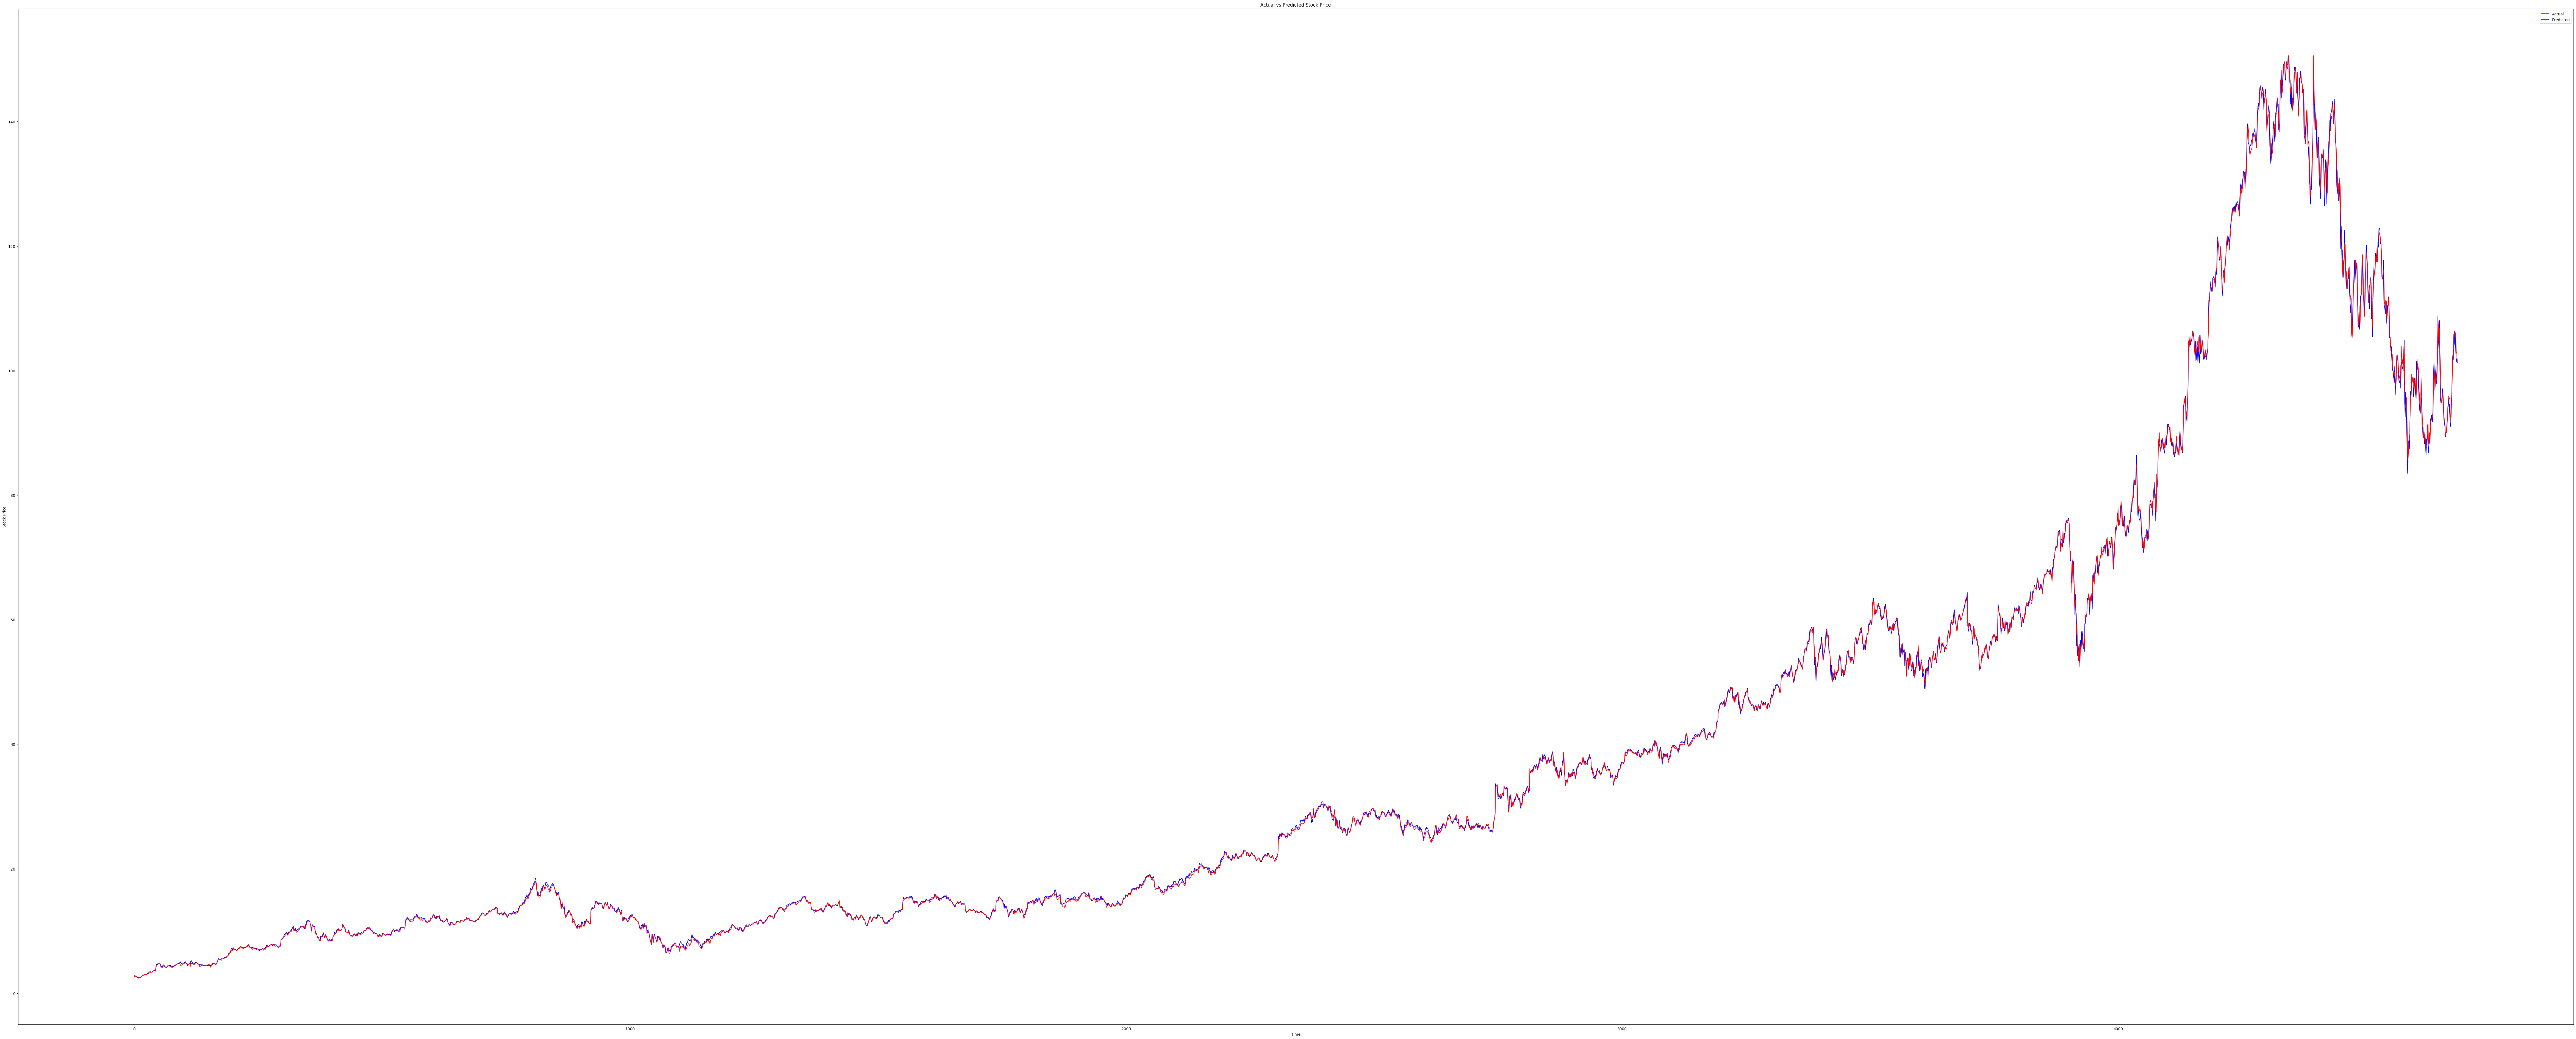

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(120,48))
plt.plot(PY['Close'], color='blue', label='Actual')
plt.plot(predicted_prices, color='red', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

plt.show()